# Definitions

Correlation is a measure of association between measured (random) variables. The Pearson's correlation coefficient quantifies the strength of this association on a simple scale: it varies between -1 and 1. The larger the absolute value of this correlation coefficient, the tighter the correlation and more predictive it is. The smaller the absolute value, the weaker the correlation and less predictive. Positive values imply a positive correlation: as I eat more ice cream, my weight goes up. Negative values imply a negative correlation: as I eat more ice cream, my weight goes down (wouldn't that be great!).

The Pearson's correlation coefficient is called parametric because it assumes a parametric form of the distributions of the two random variables, $X$ and $Y$; specifically, that both variables are [normally distributed](https://colab.research.google.com/drive/1-KxH3FCq5rDyyO33HXxewIv-kKldkINi?usp=sharing).

# Computing for a population

When you have full knowledge of the joint distribution of $𝑋$ and $Y$ (e.g., when working with an idealized model, not with real, finite data sets), the Pearson's correlation coefficient is typically denoted as $\rho$ and computed in terms of the covariance between the two variables, normalized by the product of their individual standard deviations:

$\quad\rho_{X,Y}=\frac{cov(X,Y)}{\sigma_x\sigma_y}$

where

$\quad cov(X,Y)=E\left [ (X-\mu_X)(Y-\mu_Y)\right ]$

in which $\mu_X$ and $\mu_Y$ are the means of $X$ and $Y$, respectively, and $E\left[\right]$ denotes expected value.

# Computing for a sample

When working with real data, you have a [sample, not a population](https://colab.research.google.com/drive/1SnVM1MPaFvMSjlDLyihgeZ25OAk-k4Nk?usp=sharing), and thus need to compute the correlation coefficient (typically denoted as *r*) using sample statistics.

## Sample Pearson's correlation coefficient

$\quad r_{X,Y}=\frac{\sum^n_{i-1}{(x_i-\bar{x})(y_i-\bar{y})}}{\sqrt{\sum^n_{i-1}{(x_i-\bar{x})^2}}\sqrt{\sum^n_{i-1}{(y_i-\bar{y})^2}}}$

where

$\quad \bar{x}=\frac{1}{n}\sum^n_{i=1}{x_i,\bar{y}}=\frac{1}{n}\sum^n_{i=1}{y_i}$

are the sample means.

## Coefficient of determination

It is possible to compute $r_{X,Y}$ not just when $X$ and $Y$ are two random variables, but also when one is a random (dependent) variable (typically $Y$) and the other is an independent or explanatory variable (typically $X$). In this case, the square of the correlation coefficient ($r^2$) quantifies the total variation in one variable ($Y$) that is explained by the regression line with respect to the other variable ($X$). This quantity is called the **coefficient of determination** and is often referred to as the fraction of explained variance

## Standard error of the sample Pearson's correlation coefficient

The standard error of the sample *r* is computed by assuming that r follows a [Student's t distribution](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing) with two degrees of freedom (because of the two variables):

$\quad s_r=\sqrt{\frac{1-r^2}{n-2}}$

Note that "standard error" refers in general to the standard deviation of a statistical estimate, which here is *r*. It is not the same thing as the "standard error of the mean", which refers to the standard deviation of a statistical estimate of a mean.

## Confidence intervals for the sample Pearson's correlation coefficient

This is a bit tricker to compute, because r is not normally distributed, particularly around the extreme values (e.g., around 1, the distribution cannot go higher than one but can take many values <1). We therefore need to do the following (a good explanation is [here](http://faculty.washington.edu/gloftus/P317-318/Useful_Information/r_to_z/PearsonrCIs.pdf)):

1\. Take the Fisher's z-transformation of r:

$\quad z=0.5\times ln(\frac{1+r}{1-r})$

2\. Compute its standard deviation as:

$\quad s_z=\sqrt{\frac{1}{n-3}}$

3\. Compute confidence intervals in this z-space as we have shown [here](https://colab.research.google.com/drive/1rdJMusMZDTaM9OGsyt27tCVkSasmRj2O?usp=sharing), as:

$\quad z \pm (z\:criterion) \times s_z$

where the *z* criterion is determined from the desired confidence value using a [z-score calculator](http://www.z-table.com) or [norminv](https://www.mathworks.com/help/stats/norminv.html) in Matlab.

4\. Then translate each *z* value back to *r* as:

$\quad r=\frac{e^{2z}-1}{e^{2z}+1}$


## Hypothesis testing on the sample Pearson's correlation coefficient

For $H_0: r=0$. Here we are considering a null distribution that is centered at *r*=0. In this case, we know that the distribution of *r* around that mean is symmetric, and the sample mean follows follows a [Student's *t* distribution](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing).  Therefore, our test statistic is simply the *t* statistic, which we compute as the residual (with respect to zero) of *r* divided by its standard error:

$\quad t=\frac{r}{s_r}$

with $n-2$ degrees of freedom.

For $H_0: r=r_s,\:where\:r_s\ne 0$. Here we are considering null distributions that are not centered at $r=0$ and therefore are not symmetric and do not follow a *t* distribution. We therefore first compute the *z* transformation of $r$ and $r_s$, as above. Now our test statistic is:

$\quad \lambda =\frac{z_r-z_{rs}}{\sqrt{\frac{1}{n-3}}}$

with $n-2$ degrees of freedom.



# Exercises

Let's examine the relationship between these two measured variables:

Wing length | Tail length
--- | ---
10.4 | 7.4
10.8 | 7.6
11.1 | 7.9
10.2 | 7.2
10.3 | 7.4
10.2 | 7.1
10.7 | 7.4
10.5 | 7.2
10.8 | 7.8
11.2 | 7.7
10.6 | 7.8
11.4 | 8.3

Assume Wing length is the $X$ variable and Tail Length is the $Y$ variable, both measured in cm.

Answers to the questions below will be found [here](https://github.com/PennNGG/Quantitative-Neuroscience/tree/master/Answers%20to%20Exercises/Python) after the due date.

##### 1\. Plot X vs Y. Do they look related?

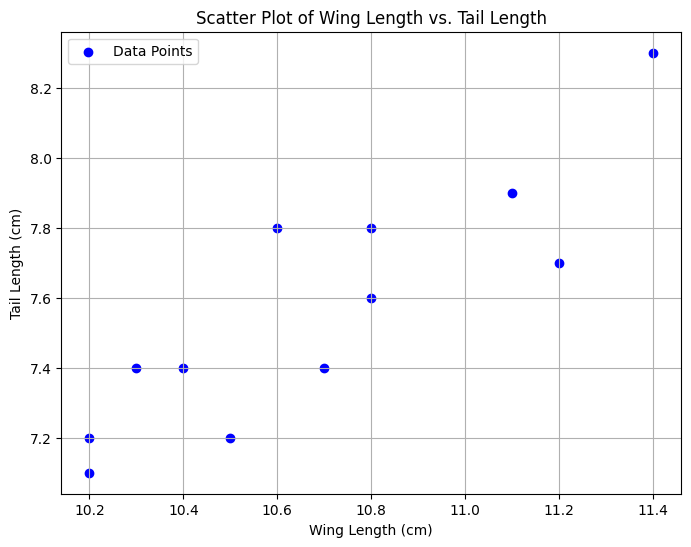

In [1]:
import matplotlib.pyplot as plt

# Data
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.scatter(wing_length, tail_length, marker='o', color='blue', label='Data Points')
plt.title('Scatter Plot of Wing Length vs. Tail Length')
plt.xlabel('Wing Length (cm)')
plt.ylabel('Tail Length (cm)')
plt.grid(True)

# Display the plot
plt.legend()
plt.show()

Yes, they look related.

##### 2\. Calculate $r_{X,Y}$ and $r_{Y,X}$, first using the equations above and then using either the Python numpy funciton [corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) or Matlab's built-in [corrcoef](https://www.mathworks.com/help/matlab/ref/corrcoef.html). Did you get the same answers?

In [4]:
import numpy as np

# Data
wing_length = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
tail_length = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

# Calculate the means
mean_wing_length = np.mean(wing_length)
mean_tail_length = np.mean(tail_length)

# Calculate rX,Y (Wing Length vs. Tail Length)
numerator_XY = np.sum((wing_length - mean_wing_length) * (tail_length - mean_tail_length))
denom_wing_XY = np.sqrt(np.sum((wing_length - mean_wing_length)**2))
denom_tail_XY = np.sqrt(np.sum((tail_length - mean_tail_length)**2))
r_XY = numerator_XY / (denom_wing_XY * denom_tail_XY)

# Calculate rY,X (Tail Length vs. Wing Length)
numerator_YX = np.sum((tail_length - mean_tail_length) * (wing_length - mean_wing_length))
denom_tail_YX = np.sqrt(np.sum((tail_length - mean_tail_length)**2))
denom_wing_YX = np.sqrt(np.sum((wing_length - mean_wing_length)**2))
r_YX = numerator_YX / (denom_tail_YX * denom_wing_YX)

print("rX,Y (Manually Calculated):", r_XY)
print("rY,X (Manually Calculated):", r_YX)

rX,Y (Manually Calculated): 0.8703545613058227
rY,X (Manually Calculated): 0.8703545613058227


In [2]:
import numpy as np

# Data
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Calculate rX,Y and rY,X using NumPy corrcoef
r_XY = np.corrcoef(wing_length, tail_length)[0, 1]
r_YX = np.corrcoef(tail_length, wing_length)[0, 1]

print("rX,Y:", r_XY)
print("rY,X:", r_YX)

rX,Y: 0.8703545613058227
rY,X: 0.8703545613058227


Yes, I got the same answers manually and by using the corrcoef formula.

##### 3\. What is the standard error of $r_{X,Y}$? The 95% confidence intervals computed from the standard error?

In [5]:
import numpy as np

# Data
wing_length = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
tail_length = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

# Calculate rX,Y manually (as done previously)
mean_wing_length = np.mean(wing_length)
mean_tail_length = np.mean(tail_length)
numerator_XY = np.sum((wing_length - mean_wing_length) * (tail_length - mean_tail_length))
denom_wing_XY = np.sqrt(np.sum((wing_length - mean_wing_length)**2))
denom_tail_XY = np.sqrt(np.sum((tail_length - mean_tail_length)**2))
r_XY = numerator_XY / (denom_wing_XY * denom_tail_XY)

# Calculate the standard error of rX,Y
n = len(wing_length)
SE_r_XY = np.sqrt((1 - r_XY**2) / (n - 2))

print("Standard Error of rX,Y:", SE_r_XY)

Standard Error of rX,Y: 0.15571863652567375


In [6]:
import numpy as np
from scipy.stats import t

# Data
wing_length = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
tail_length = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

# Calculate rX,Y and SE_r_XY manually (as done previously)
mean_wing_length = np.mean(wing_length)
mean_tail_length = np.mean(tail_length)
numerator_XY = np.sum((wing_length - mean_wing_length) * (tail_length - mean_tail_length))
denom_wing_XY = np.sqrt(np.sum((wing_length - mean_wing_length)**2))
denom_tail_XY = np.sqrt(np.sum((tail_length - mean_tail_length)**2))
r_XY = numerator_XY / (denom_wing_XY * denom_tail_XY)
n = len(wing_length)
SE_r_XY = np.sqrt((1 - r_XY**2) / (n - 2))

# Calculate the critical value for a 95% confidence interval
alpha = 0.05  # Significance level (1 - confidence level)
df = n - 2    # Degrees of freedom
critical_value = t.ppf(1 - alpha / 2, df)

# Calculate the confidence interval
lower_bound = r_XY - critical_value * SE_r_XY
upper_bound = r_XY + critical_value * SE_r_XY

print("95% Confidence Interval for rX,Y: ({:.4f}, {:.4f})".format(lower_bound, upper_bound))

95% Confidence Interval for rX,Y: (0.5234, 1.2173)


##### 4\. Should the value of $r_{X,Y}$ be considered significant at the *p*<0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for $H_0: r_{X,Y}=0$?

In [7]:
import numpy as np
from scipy.stats import t

# Data
wing_length = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
tail_length = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

# Calculate rX,Y and SE_r_XY manually (as done previously)
mean_wing_length = np.mean(wing_length)
mean_tail_length = np.mean(tail_length)
numerator_XY = np.sum((wing_length - mean_wing_length) * (tail_length - mean_tail_length))
denom_wing_XY = np.sqrt(np.sum((wing_length - mean_wing_length)**2))
denom_tail_XY = np.sqrt(np.sum((tail_length - mean_tail_length)**2))
r_XY = numerator_XY / (denom_wing_XY * denom_tail_XY)
n = len(wing_length)
SE_r_XY = np.sqrt((1 - r_XY**2) / (n - 2))

# Degrees of freedom
df = n - 2

# Significance level
alpha = 0.05

# Calculate the critical values for a two-tailed test
critical_value_lower = -t.ppf(1 - alpha / 2, df)
critical_value_upper = t.ppf(1 - alpha / 2, df)

# Calculate the t-statistic
t_statistic = r_XY / SE_r_XY

# Check significance
if abs(t_statistic) > critical_value_upper or abs(t_statistic) < critical_value_lower:
    print("Reject the null hypothesis: rX,Y is statistically significant.")
else:
    print("Fail to reject the null hypothesis: rX,Y is not statistically significant.")

print("t-statistic:", t_statistic)
print("Critical Value (Lower):", critical_value_lower)
print("Critical Value (Upper):", critical_value_upper)

Reject the null hypothesis: rX,Y is statistically significant.
t-statistic: 5.589276792584329
Critical Value (Lower): -2.2281388519649385
Critical Value (Upper): 2.2281388519649385


##### 5\. Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate $𝐻_0: r=0.75$.

In [8]:
import numpy as np
from scipy.stats import t

# Student's calculated correlation value
student_r = 0.75

# Data (assuming the same dataset)
wing_length = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
tail_length = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

# Calculate rX,Y and SE_r_XY manually (as done previously)
mean_wing_length = np.mean(wing_length)
mean_tail_length = np.mean(tail_length)
numerator_XY = np.sum((wing_length - mean_wing_length) * (tail_length - mean_tail_length))
denom_wing_XY = np.sqrt(np.sum((wing_length - mean_wing_length)**2))
denom_tail_XY = np.sqrt(np.sum((tail_length - mean_tail_length)**2))
r_XY = numerator_XY / (denom_wing_XY * denom_tail_XY)
n = len(wing_length)
SE_r_XY = np.sqrt((1 - r_XY**2) / (n - 2))

# Degrees of freedom
df = n - 2

# Significance level
alpha = 0.05

# Calculate the t-statistic
t_statistic = (student_r - 0.75) / SE_r_XY

# Calculate the critical values for a two-tailed test
critical_value_lower = -t.ppf(1 - alpha / 2, df)
critical_value_upper = t.ppf(1 - alpha / 2, df)

# Compare the t-statistic to the critical values
if t_statistic < -critical_value_upper or t_statistic > critical_value_upper:
    print("Reject the null hypothesis: r is statistically significantly different from 0.75.")
else:
    print("Fail to reject the null hypothesis: r is not statistically significantly different from 0.75.")

print("t-statistic:", t_statistic)
print("Critical Value (Lower):", -critical_value_upper)
print("Critical Value (Upper):", critical_value_upper)

Fail to reject the null hypothesis: r is not statistically significantly different from 0.75.
t-statistic: 0.0
Critical Value (Lower): -2.2281388519649385
Critical Value (Upper): 2.2281388519649385


##### 6\. Finally, calculate the statistical power and sample size needed to reject $H_0:r=0\:when\:r\ge 0.5$.

In [9]:
import numpy as np
import statsmodels.api as sm

# Define parameters
alpha = 0.05  # Significance level
desired_power = 0.80  # Desired level of power (80%)

# Define a range of effect sizes (true correlations)
effect_sizes = np.linspace(0.5, 0.9, 11)

# Initialize an empty list to store the required sample sizes
required_sample_sizes = []

# Calculate the required sample size for each effect size
for effect_size in effect_sizes:
    # Calculate the required sample size for the specified power and effect size
    required_sample_size = sm.stats.TTestIndPower().solve_power(
        effect_size=effect_size,
        alpha=alpha,
        power=desired_power,
        alternative='larger',  # One-tailed test
    )
    required_sample_sizes.append(required_sample_size)

# Print the results
for i, effect_size in enumerate(effect_sizes):
    print(f"Effect Size (r): {effect_size:.2f} - Required Sample Size: {int(required_sample_sizes[i])}")

Effect Size (r): 0.50 - Required Sample Size: 50
Effect Size (r): 0.54 - Required Sample Size: 43
Effect Size (r): 0.58 - Required Sample Size: 37
Effect Size (r): 0.62 - Required Sample Size: 32
Effect Size (r): 0.66 - Required Sample Size: 29
Effect Size (r): 0.70 - Required Sample Size: 25
Effect Size (r): 0.74 - Required Sample Size: 23
Effect Size (r): 0.78 - Required Sample Size: 21
Effect Size (r): 0.82 - Required Sample Size: 19
Effect Size (r): 0.86 - Required Sample Size: 17
Effect Size (r): 0.90 - Required Sample Size: 15


# Additional Resources


- Differences between correlation and regression are discussed [here](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression) and [here](http://www.biostathandbook.com/linearregression.html).

- A reference on [how to choose the appropriate measure of association](https://journals.sagepub.com/doi/pdf/10.1177/8756479308317006) (Khamis 2008).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania